# In this notebook, I'm going to first download the CIFAR-10 dataset and then train a CNN on it.
## Here we imported pytorch libraries which we'll going to use in next cells

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import torch
import torchvision
from torchvision import datasets, transforms
from torchvision.ops import MLP
from torch import nn, optim
import cv2
from tqdm import tqdm

c:\Users\smerf\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## In this cell we want to specify the device in which our codes are going to be ran.
### Also the result is printed

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cpu


### In this cell, we'ere going to define a list of transforms that we want to apply on data before training

First convert PIL image object to tensor, then apply 0-mean normalizatoin with std of 1

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0,), (1,)),
])

## Now we're going to download the data (CIFAR10) and sperate it into two parts, train and test
## Also an offline archive is created for CIFAR10 and transformations are done on raw images

In [4]:
train_path = 'ds/train/'
test_path = 'ds/test/'
dstrain = datasets.CIFAR10(train_path, train=True, download=True, transform=transform)
dstest = datasets.CIFAR10(test_path, train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


### We have 50,000 training sample images and 10,000 for testing

In [5]:
print(dstrain)
print(dstest)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ds/train/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0,), std=(1,))
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ds/test/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0,), std=(1,))
           )


TTTTTTTTTTTTTTTTt


In [6]:
[opt for opt in dir(dstrain) if opt[0]!='_']

['base_folder',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'filename',
 'meta',
 'root',
 'target_transform',
 'targets',
 'test_list',
 'tgz_md5',
 'train',
 'train_list',
 'transform',
 'transforms',
 'url']

### CIFAR10 contains 10 classes of images, you can see class labels below
### Images are 32*32 RGB and for each class we have 6,000 images
### DS is sperated in 5 trainig batch and 1 test batch each contains 10,000 images
### Images are not divided between training batches uniformly (which means, one batch may contains more image from one class than others)
### But there are exactly 5000 trainig image and 1000 test image for each class

In [7]:
print(len(dstrain.classes))
print(dstrain.classes)

10
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### Here we defined a loader which is a wrapper around data that can help us divide data into batches and only load those batches that we need. It's saving lots of memory

In [8]:
ldtrain = torch.utils.data.DataLoader(dstrain, batch_size=64, shuffle=True)
ldval = torch.utils.data.DataLoader(dstest, batch_size=64, shuffle=True)

Now let's show a subset of images, to do so, first we converted train set loaded to a python iterator and get the first iteration value out of it. 

In [10]:
dataiter = iter(ldtrain)
images ,labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 3, 32, 32])
torch.Size([64])


Now in this cell, we just printed a batch of the images,<br>
Notice that to do so, we need to move RGB channel to last axis of tensor

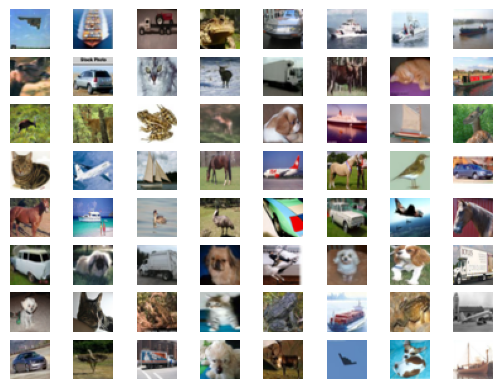

In [23]:
noi = 8
num_of_images = noi * noi
for index in range(1, num_of_images+1):
    img = images[index-1]
    
    _ = plt.subplot(noi,noi, index)
    _ = plt.axis('off')
    _ = plt.imshow(img.moveaxis(0, -1))